In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# There are no categorical variable in the independent varibale
# Outcome is the Target(dependent) variable
# there are No Null values in the Dataset.

In [9]:
# Checking for the duplicate records 
dups=df.duplicated()

print(' Number of duplicate records in the dataset are ', dups.sum())
df[dups]

 Number of duplicate records in the dataset are  0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [10]:
# Checking for Null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Univariate Analysis

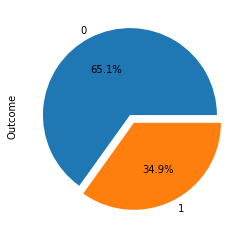

In [24]:
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%');

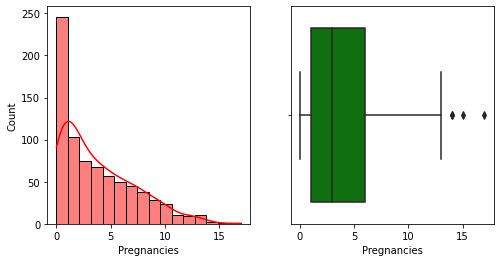

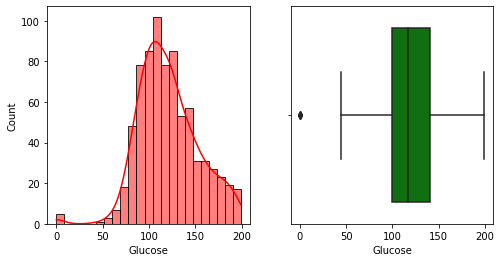

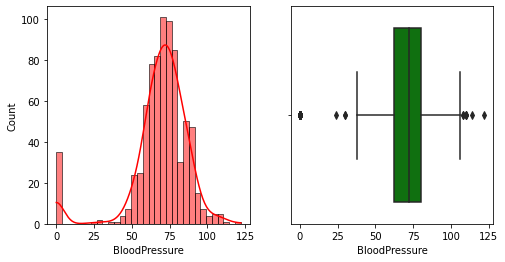

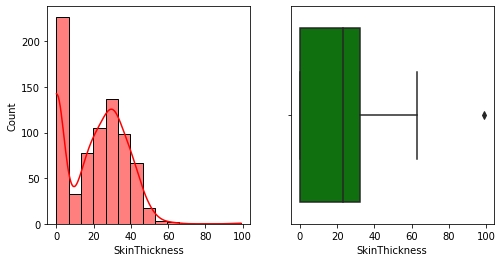

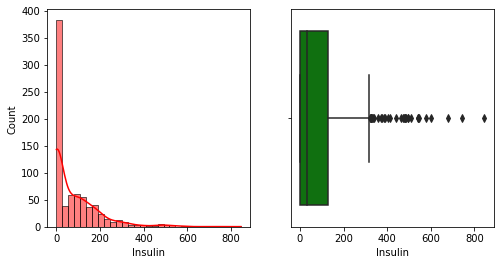

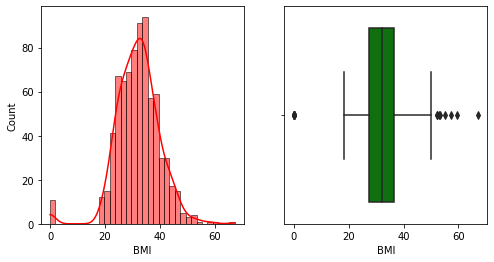

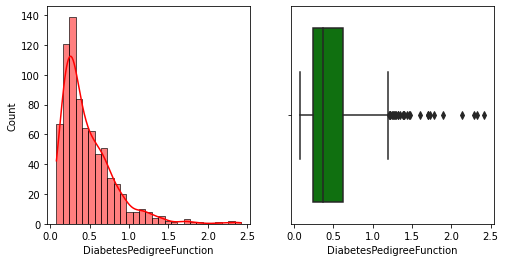

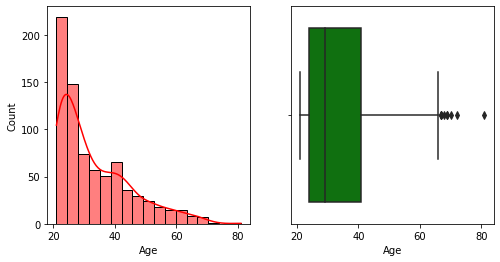

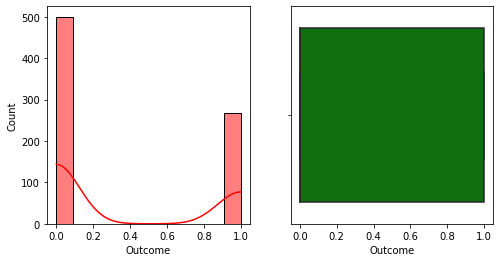

In [27]:
for i in df.columns:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(df[i],ax=axes[1],color='green')

In [28]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [29]:
#There are some possible outliers and the same would be treated accordingly. 
#Skewness is observed in the continuous variables.

In [30]:
""" If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.

And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.

"""

' If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.\n\nAnd if the skewness is less than -1 and greater than +1 then our data is heavily skewed.\n\n'

## To Handle Right Skewedness (mode < median < mean)

In [33]:
# 1 log transformation
log_Pregnancies = np.log(df['Pregnancies']) 

In [34]:
log_Pregnancies.skew()

nan

In [35]:
"""It’s giving us nan because there are some values as the zero. In log transformation, it deals with only the positive and negative numbers, not with zero. The log is the range in between (- infinity to infinity) but greater or less than zero. """

'It’s giving us nan because there are some values as the zero. In log transformation, it deals with only the positive and negative numbers, not with zero. The log is the range in between (- infinity to infinity) but greater or less than zero. '

In [36]:
#  2 Root Transformation
sqrt_Pregnancies = np.sqrt(df['Pregnancies'])
sqrt_Pregnancies.skew()

-0.15893792070470467

In [37]:
""" the skewed values reduced in a range +0.5 to -0.5 now we can say data is fairly symmetrical"""

' the skewed values reduced in a range +0.5 to -0.5 now we can say data is fairly symmetrical'

In [38]:
#  2 Root Transformation
sqrt_Insulin = np.sqrt(df['Insulin'])
sqrt_Insulin.skew()

0.6299554383696059

In [39]:
sqrt_DiabetesPedigreeFunction = np.sqrt(df['DiabetesPedigreeFunction'])
sqrt_DiabetesPedigreeFunction.skew()

0.9018017197488095

In [40]:
# 3 Cube root
cube_DiabetesPedigreeFunction = np.cbrt(df['DiabetesPedigreeFunction'])
cube_DiabetesPedigreeFunction.skew()

0.6222161053177405

In [41]:
cube_DiabetesPedigreeFunction.head(3)

0    0.855899
1    0.705400
2    0.875904
Name: DiabetesPedigreeFunction, dtype: float64

In [55]:
df['Insulin'] = sqrt_Insulin
df['Pregnancies'] = sqrt_Pregnancies
df['DiabetesPedigreeFunction'] = cube_DiabetesPedigreeFunction

In [62]:
df['DiabetesPedigreeFunction'].head()

0    0.855899
1    0.705400
2    0.875904
3    0.550688
4    1.317706
Name: DiabetesPedigreeFunction, dtype: float64

## To Handle Left skewness ( mean>median > mode)

In [49]:
#BloodPressure, BMI
cube_BloodPressure = np.power(df['BloodPressure'],3)
cube_BloodPressure.skew()

1.2685601752718187

In [51]:
recipr_BloodPressure = np.reciprocal(df['BloodPressure'])
recipr_BloodPressure.skew()

-4.366353924327911

In [54]:
cube_BMI = np.power(df['BMI'],2)
cube_BMI.skew()

1.244733198516917

In [56]:
recipr_BMI = np.reciprocal(df['BMI'])
recipr_BMI.skew()

nan

In [57]:
#Checking for zero values 
for i in df.columns:
    print('Number of zeros in column' ,i,df[(df[i] == 0)][i].count())

Number of zeros in column Pregnancies 111
Number of zeros in column Glucose 5
Number of zeros in column BloodPressure 35
Number of zeros in column SkinThickness 227
Number of zeros in column Insulin 374
Number of zeros in column BMI 11
Number of zeros in column DiabetesPedigreeFunction 0
Number of zeros in column Age 0
Number of zeros in column Outcome 500


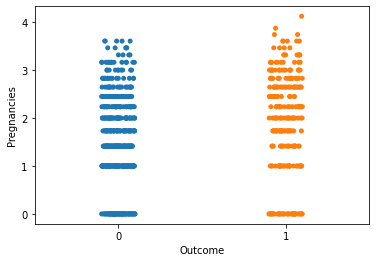

In [58]:
sns.stripplot(df["Outcome"], df['Pregnancies'], jitter=True)  ### Distribution of values
plt.show()

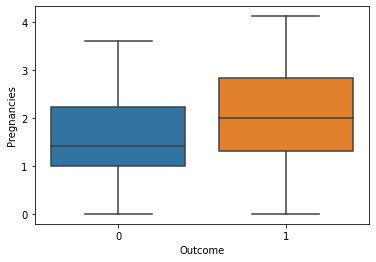

In [59]:
sns.boxplot(df["Outcome"],df['Pregnancies']) 
plt.show()

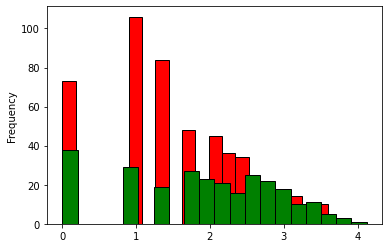

In [61]:
df[df["Outcome"]==0].Pregnancies.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].Pregnancies.plot.hist(bins=20,edgecolor='black',color='green');

#### We observe from the boxplot and the Stripplot that higher the number of pragnancies more are the risks of diabetes

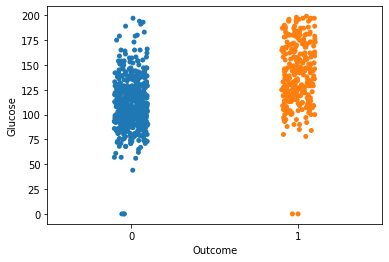

In [63]:
sns.stripplot(df["Outcome"], df['Glucose'], jitter=True)  ### Distribution of values
plt.show()


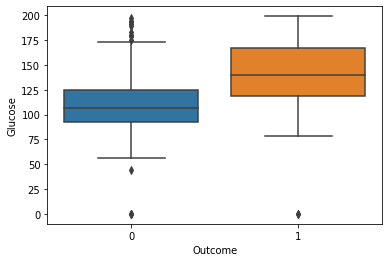

In [64]:
sns.boxplot(df["Outcome"],df['Glucose']) 
plt.show()

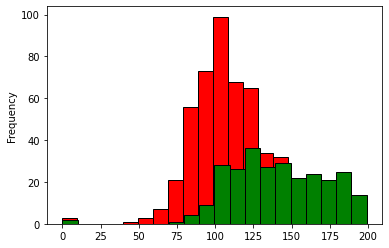

In [65]:
df[df["Outcome"]==0].Glucose.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].Glucose.plot.hist(bins=20,edgecolor='black',color='green');

#### Higher Glucose level leads to more chances of Diabetes

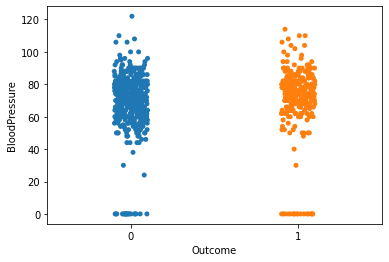

In [67]:
sns.stripplot(df["Outcome"], df['BloodPressure'], jitter=True)  ### Distribution of values
plt.show()

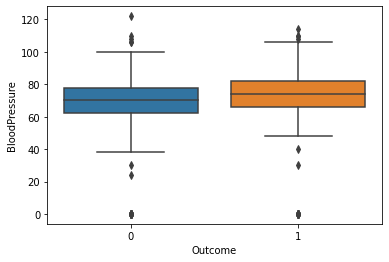

In [68]:
sns.boxplot(df["Outcome"],df['BloodPressure']) 
plt.show()

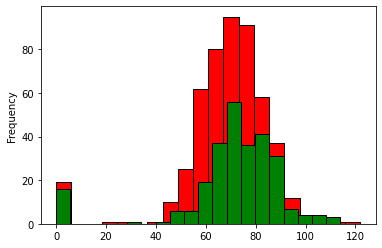

In [69]:
df[df["Outcome"]==0].BloodPressure.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].BloodPressure.plot.hist(bins=20,edgecolor='black',color='green');

#### Looking at both plots we can seee that the probabilty of diabetes is higher when Blood pressure is high.

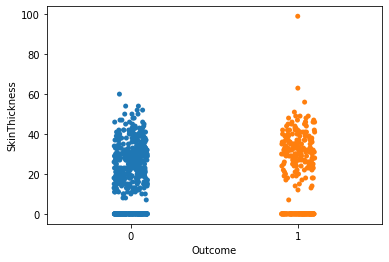

In [70]:
sns.stripplot(df["Outcome"], df['SkinThickness'], jitter=True)  ### Distribution of values
plt.show()

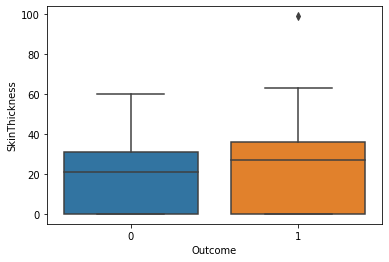

In [71]:
sns.boxplot(df["Outcome"],df['SkinThickness']) 
plt.show()

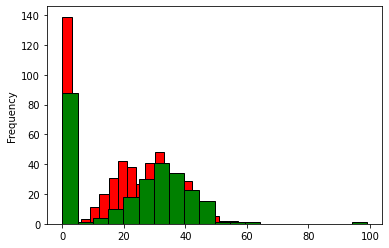

In [72]:
df[df["Outcome"]==0].SkinThickness.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].SkinThickness.plot.hist(bins=20,edgecolor='black',color='green');

#### relation of Skin thickness of patients with diabetes mellitus has been described controversially by scientists.

#### we observe that Skinthickness is slightly higher for diabetic patients

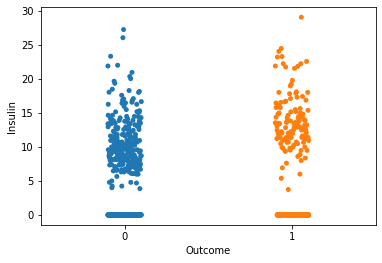

In [73]:
sns.stripplot(df["Outcome"], df['Insulin'], jitter=True)  ### Distribution of values
plt.show()

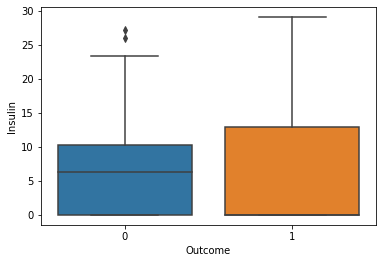

In [75]:
sns.boxplot(df["Outcome"],df['Insulin']) 
plt.show()

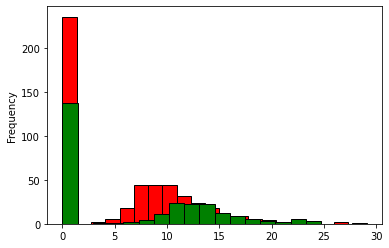

In [74]:
df[df["Outcome"]==0].Insulin.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].Insulin.plot.hist(bins=20,edgecolor='black',color='green');

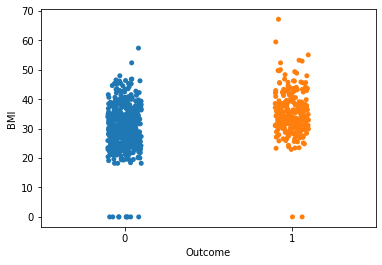

In [76]:
sns.stripplot(df["Outcome"], df['BMI'], jitter=True)  ### Distribution of values
plt.show()

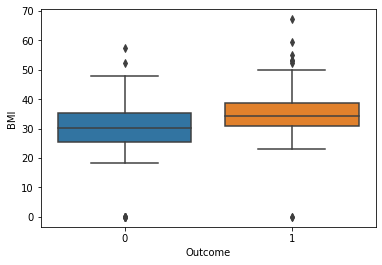

In [77]:
sns.boxplot(df["Outcome"],df['BMI']) 
plt.show()

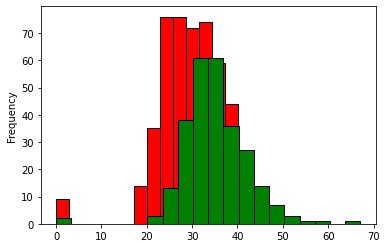

In [78]:
df[df["Outcome"]==0].BMI.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].BMI.plot.hist(bins=20,edgecolor='black',color='green');

#### We observe that higher the BMI more the chances of diabetes.


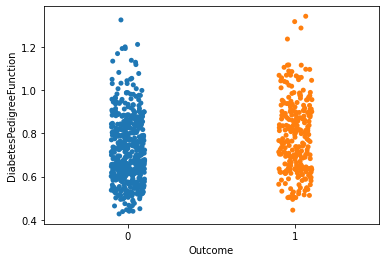

In [80]:
sns.stripplot(df["Outcome"], df['DiabetesPedigreeFunction'], jitter=True)  ### Distribution of values
plt.show()

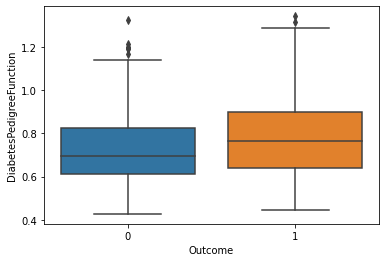

In [81]:
sns.boxplot(df["Outcome"],df['DiabetesPedigreeFunction']) 
plt.show()

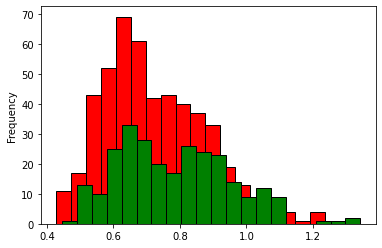

In [82]:
df[df["Outcome"]==0].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='green');

#### We observe that diabetic people have higher DiabetesPedigreeFunction value i,e genetic influence plays some role in the Diabetes among patients.

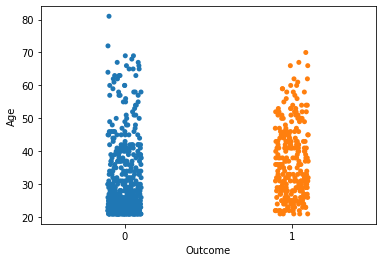

In [83]:
sns.stripplot(df["Outcome"], df['Age'], jitter=True)  ### Distribution of values
plt.show()

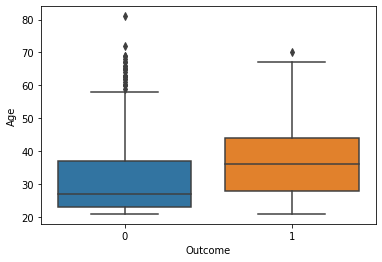

In [84]:
sns.boxplot(df["Outcome"],df['Age']) 
plt.show()

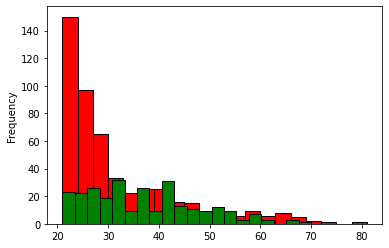

In [85]:
df[df["Outcome"]==0].Age.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].Age.plot.hist(bins=20,edgecolor='black',color='green');

#### we observe that there is less chance of diabetes among young people and more chances for the people above the Age of years

## Data Cleaning

In [87]:
# some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN :
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [88]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [89]:
# We replace the NUll values with median as all the variable contain outliers
for i in df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]:
    df[i]=df[i].fillna(df[i].median())

In [90]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,1.695477,0.985735,0.000000,1.000000,1.732051,2.449490,4.123106
Glucose,768.0,121.656250,30.438286,44.000000,99.750000,117.000000,140.250000,199.000000
BloodPressure,768.0,72.386719,12.096642,24.000000,64.000000,72.000000,80.000000,122.000000
SkinThickness,768.0,29.108073,8.791221,7.000000,25.000000,29.000000,32.000000,99.000000
Insulin,768.0,11.474987,3.001379,3.741657,11.022634,11.180340,11.280498,29.086079
BMI,768.0,32.455208,6.875177,18.200000,27.500000,32.300000,36.600000,67.100000
DiabetesPedigreeFunction,768.0,0.743192,0.162408,0.427266,0.624666,0.719517,0.855558,1.342575
Age,768.0,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


## Performing Multivariate Analysis post treatment of Null values

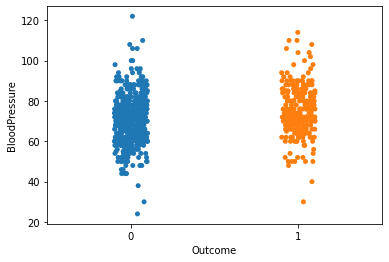

In [92]:
sns.stripplot(df["Outcome"], df['BloodPressure'], jitter=True)  ### Distribution of values
plt.show()


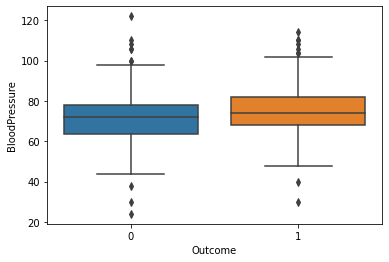

In [93]:
sns.boxplot(df["Outcome"],df['BloodPressure']) 
plt.show()

<AxesSubplot:ylabel='Frequency'>

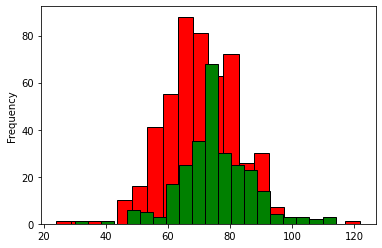

In [94]:
df[df["Outcome"]==0].BloodPressure.plot.hist(bins=20,edgecolor='black',color='red')
df[df["Outcome"]==1].BloodPressure.plot.hist(bins=20,edgecolor='black',color='green')

#### Post correcting the Null values it is more Evident now that higher the BloodPressure more the chances of diabetes.

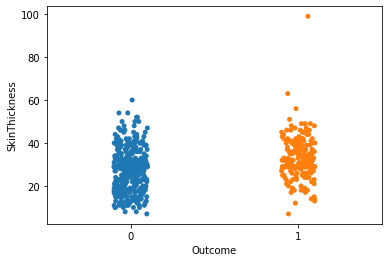

In [96]:
sns.stripplot(df["Outcome"], df['SkinThickness'], jitter=True)  ### Distribution of values
plt.show()

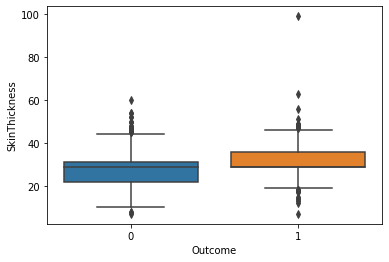

In [97]:
sns.boxplot(df["Outcome"],df['SkinThickness']) 
plt.show()

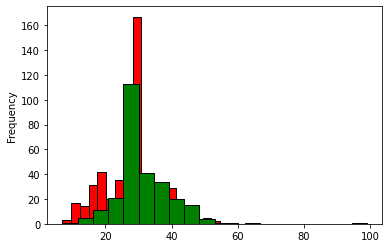

In [98]:
df[df["Outcome"]==0].SkinThickness.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].SkinThickness.plot.hist(bins=20,edgecolor='black',color='green');

##### Post correcting the Null values it is more Evident now that higher the SkinThickness more the chances of diabetes.

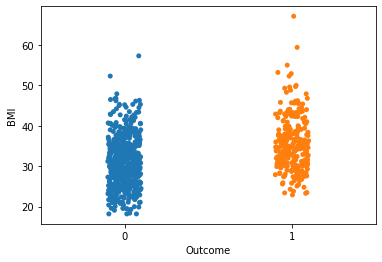

In [99]:
sns.stripplot(df["Outcome"], df['BMI'], jitter=True)  ### Distribution of values
plt.show()

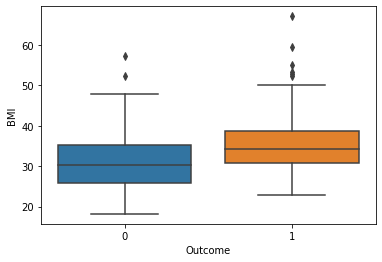

In [100]:
sns.boxplot(df["Outcome"],df['BMI']) 
plt.show()

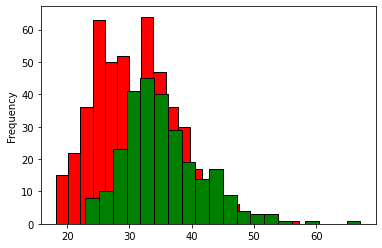

In [101]:
df[df["Outcome"]==0].BMI.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].BMI.plot.hist(bins=20,edgecolor='black',color='green');

#### Post correcting the Null values it is more Evident now that higher the BMI more the chances of diabetes.

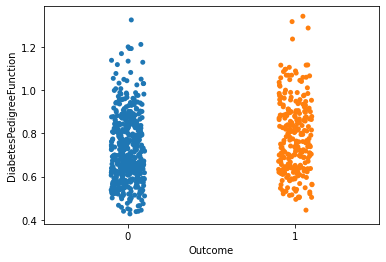

In [102]:
sns.stripplot(df["Outcome"], df['DiabetesPedigreeFunction'], jitter=True)  ### Distribution of values
plt.show()

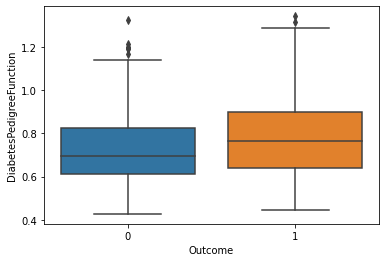

In [103]:
sns.boxplot(df["Outcome"],df['DiabetesPedigreeFunction']) 
plt.show()

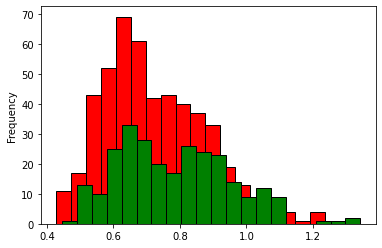

In [104]:
df[df["Outcome"]==0].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor='black',color='green');

#### Post correcting the Null values it is more Evident now that higher the DiabetesPedigreeFunction more the chances of diabetes.


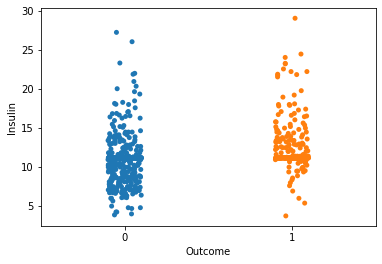

In [105]:
sns.stripplot(df["Outcome"], df['Insulin'], jitter=True)  ### Distribution of values
plt.show()

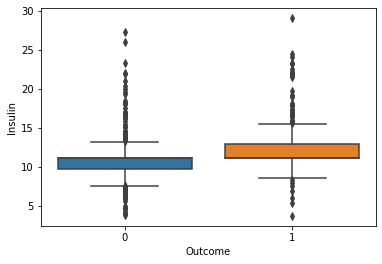

In [106]:
sns.boxplot(df["Outcome"],df['Insulin']) 
plt.show()

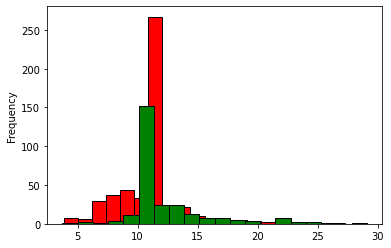

In [107]:
df[df["Outcome"]==0].Insulin.plot.hist(bins=20,edgecolor='black',color='red');
df[df["Outcome"]==1].Insulin.plot.hist(bins=20,edgecolor='black',color='green');

#### Post correcting the Null values it is more Evident now that diabetic people are required to more insulin in order to keep the Glucose level lower.

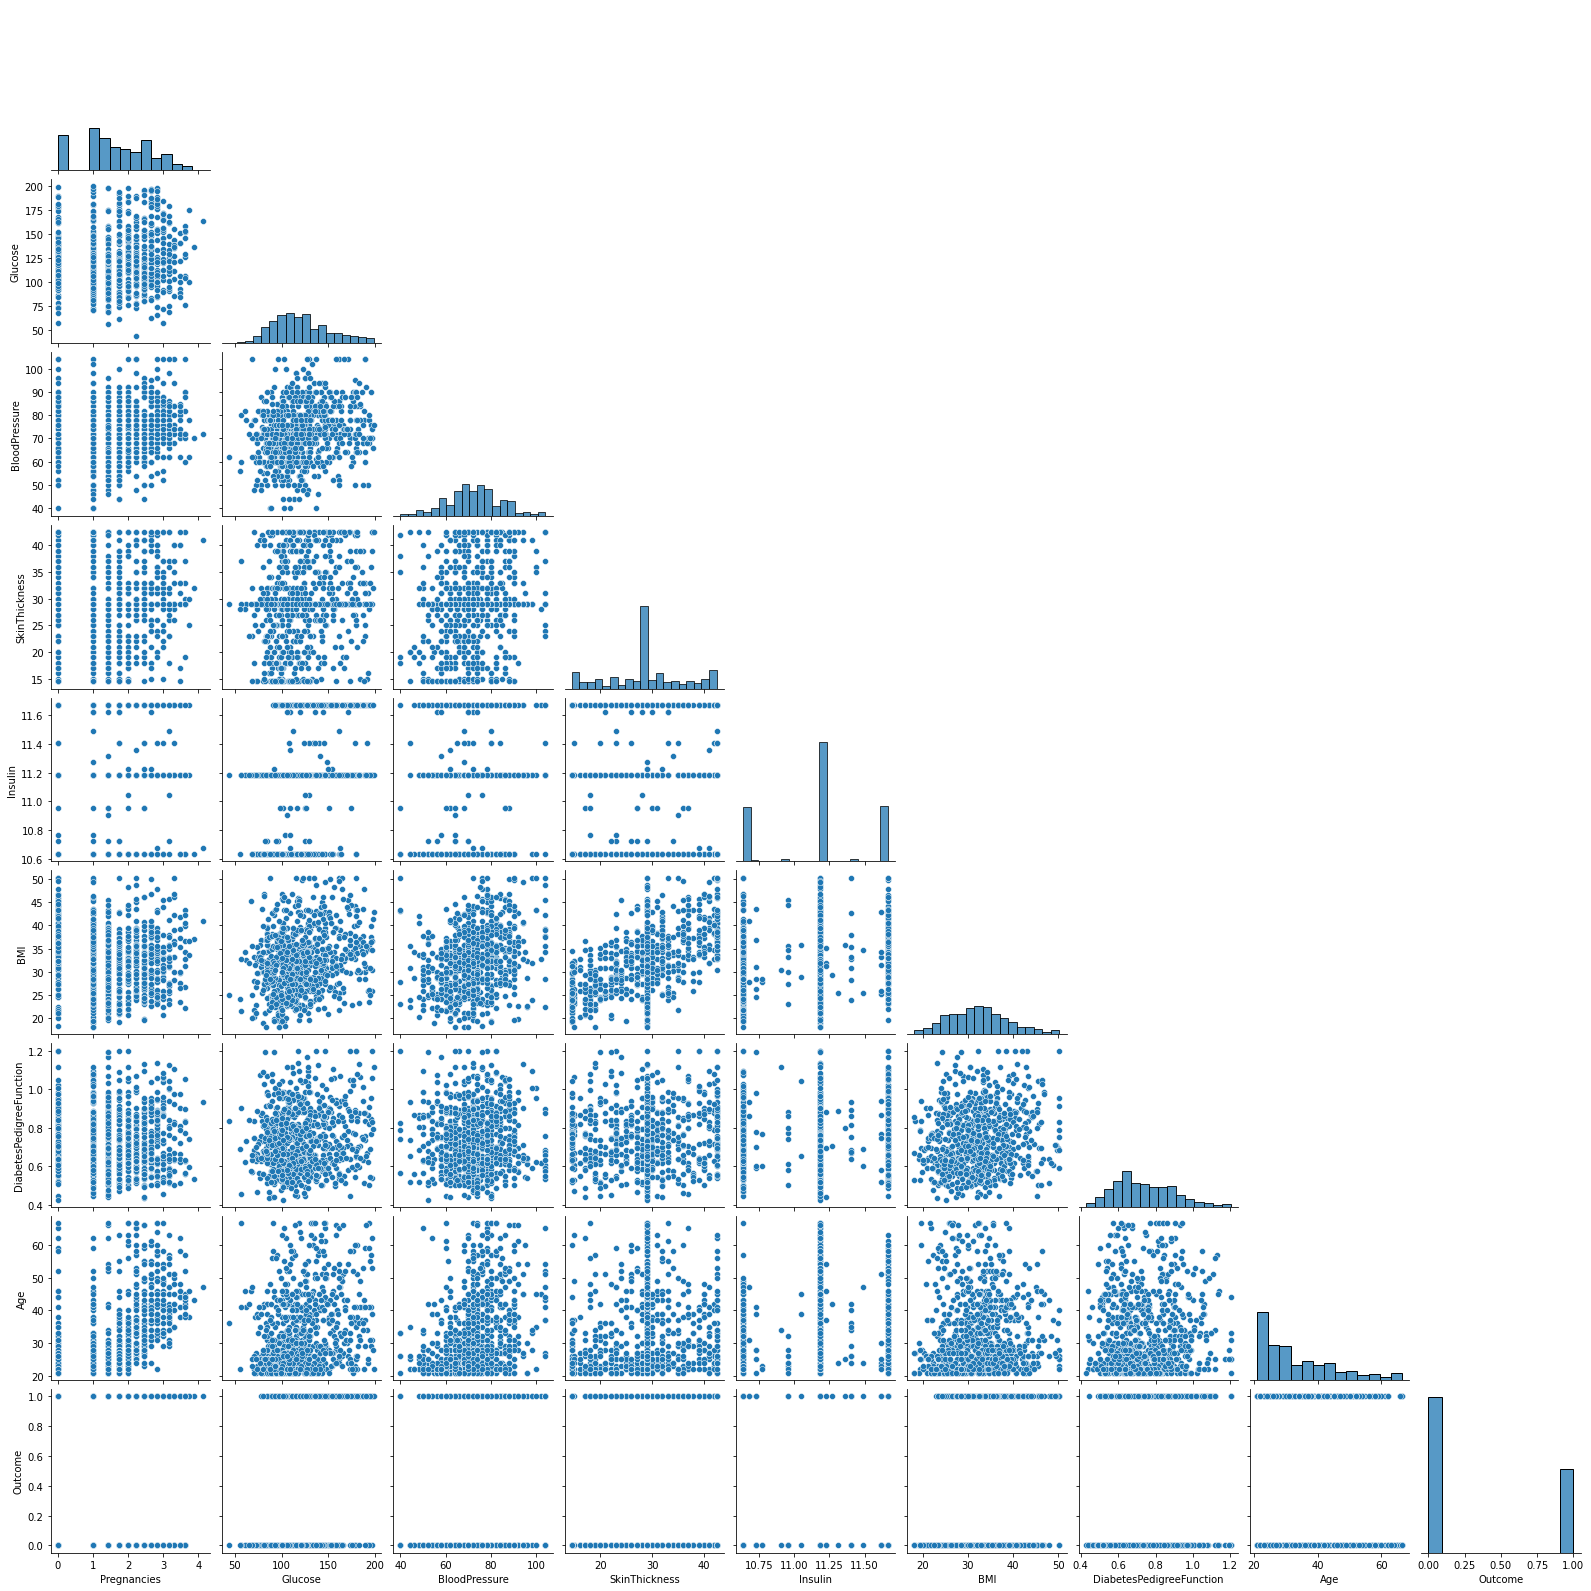

In [118]:
# Looking at the Relation Between the Independent Variables
sns.pairplot(df,corner=True);

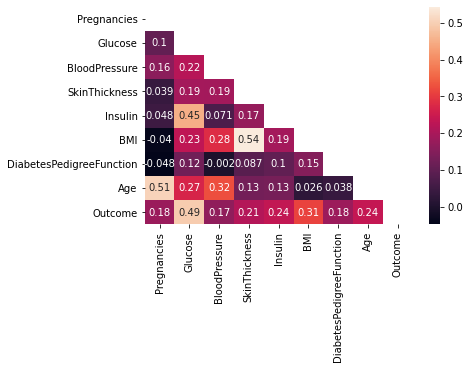

In [113]:
sns.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True);

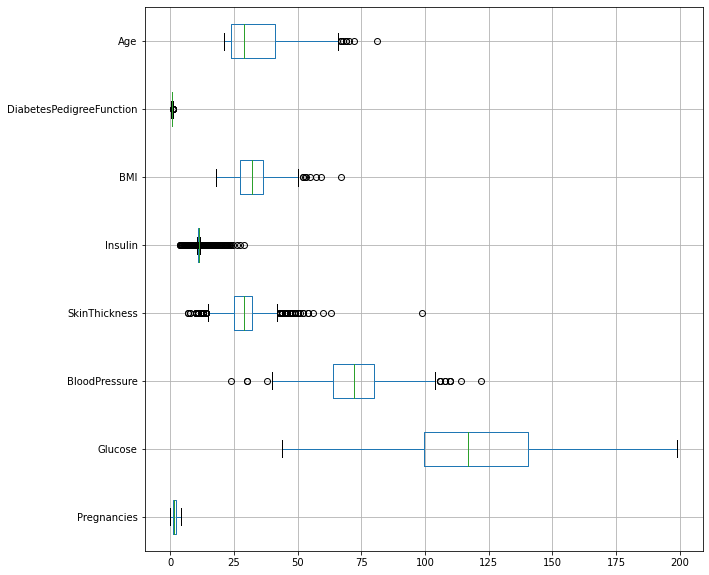

In [111]:
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)
plt.show()

In [112]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [114]:
def Remove_Outlier (col):
    Q1,Q3 = np.percentile (col,[25,75])
    
    IQR= Q3-Q1
    
    upper_range =  Q3+(IQR*1.5)
    
    lower_range =  Q1-(IQR*1.5)
    
    return upper_range,lower_range

In [116]:
for i in df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]:
    ur,lr = Remove_Outlier(df[i])
    df[i]= np.where(df[i]>ur,ur,df[i])
    df[i]= np.where(df[i]<lr,lr,df[i])

<AxesSubplot:>

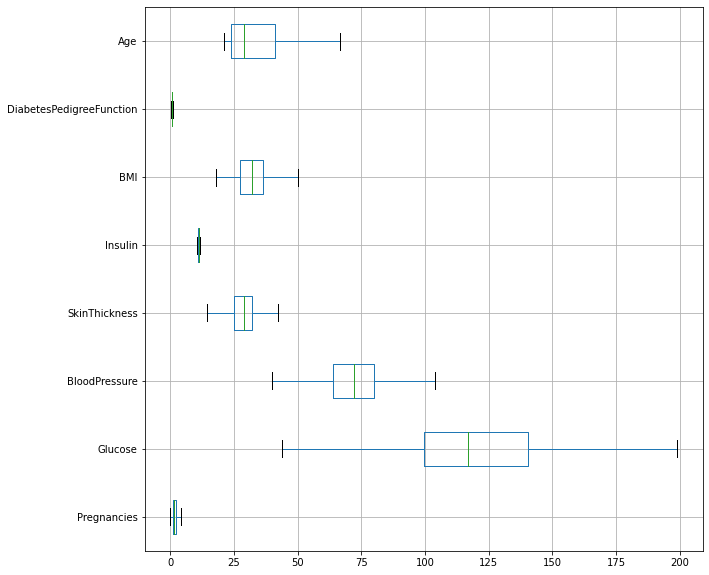

In [117]:
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)

## Scaling the Data.

In [119]:
df_New=df


In [120]:
num=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df_New[num])


array([[ 0.76542237,  0.86604475, -0.03063207, ...,  0.18109219,
         0.70781463,  1.44569096],
       [-0.70600148, -1.20506583, -0.54391414, ..., -0.8694653 ,
        -0.23177898, -0.189304  ],
       [ 1.15009394,  2.01666174, -0.71500816, ..., -1.36472812,
         0.83270896, -0.10325164],
       ...,
       [ 0.54877104, -0.02157407, -0.03063207, ..., -0.92949716,
        -0.72916227, -0.27535637],
       [-0.70600148,  0.14279979, -1.05719621, ..., -0.34418655,
        -0.24015952,  1.18753386],
       [-0.70600148, -0.94206766, -0.20172609, ..., -0.29916266,
        -0.38780415, -0.87772293]])

In [122]:
X=df_New.drop('Outcome',axis=1)
Y=df_New.pop('Outcome')

In [123]:
# Spliting the Data Set between training and test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,stratify=Y,random_state=0)

In [124]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='newton-cg',max_iter=1000)
lr_model= lr.fit(X_train,Y_train)

In [126]:
Y_test_lr_predict=lr_model.predict(X_test)

In [127]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_lr_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_lr_predict))

Confussion Matrix 
 [[129  21]
 [ 37  44]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



## Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=30,max_features='auto',max_depth=5)
rfcl.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [129]:
Y_test_rfcl_predict=rfcl.predict(X_test)
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_rfcl_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_rfcl_predict))

Confussion Matrix 
 [[130  20]
 [ 35  46]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



## Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB_model=NB.fit(X_train,Y_train)

In [131]:
Y_test_NB_predict=NB_model.predict(X_test)
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_NB_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_NB_predict))

Confussion Matrix 
 [[124  26]
 [ 33  48]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.59      0.62        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#### We observe that Recall of all the models is low.


### Using SMOTE Method to improve Model Performance

In [134]:
# !pip3 install imblearn

In [135]:
from imblearn.over_sampling import SMOTE


In [136]:
sm = SMOTE(random_state=0)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

## Naive Bayes (SMOTE)

In [137]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB_model=NB.fit(X_train_res,Y_train_res)

In [138]:
Y_predict_test=NB_model.predict(X_test)
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_predict_test))
print('Classification Report_train','\n',metrics.classification_report(Y_test,Y_predict_test))

Confussion Matrix 
 [[115  35]
 [ 24  57]]
Classification Report_train 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.62      0.70      0.66        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.75      0.74      0.75       231



##  Random Forest Classifier (SMOTE)

In [139]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=30,max_features='auto',max_depth=5)
rfcl.fit(X_train_res,Y_train_res)
RandomForestClassifier(max_depth=5, n_estimators=30)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [140]:
Y_test_rfcl_predict=rfcl.predict(X_test)

In [142]:
print('Confussion Matrix', '\n',metrics.confusion_matrix(Y_test,Y_test_rfcl_predict))
print('Classification Report_test','\n',metrics.classification_report(Y_test,Y_test_rfcl_predict))

Confussion Matrix 
 [[117  33]
 [ 24  57]]
Classification Report_test 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       150
           1       0.63      0.70      0.67        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.75      0.76       231



#### We observe that Performace of all models have significantly improved
